In [21]:
# Cài đặt Kaggle CLI
!pip install kaggle

# Tải dataset từ Kaggle
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset -p /content/dataset

# Giải nén file zip
!unzip /content/dataset/kaggle-cat-vs-dog-dataset.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: /content/dataset/kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  

In [ ]:
!pip install kaggle
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data
!unzip /content/dog-vs-cat-images-data.zip -d /content/datasets

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/dogcat/validation/cats/cat.37.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.370.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3700.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3701.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3702.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3703.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3704.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3705.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3706.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3707.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3708.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.3709.jpg  
  inflating: /content/datasets/dogcat/validation/cats/cat.371.jpg  
  inflating: /content/datasets/dogcat/validation/cats/ca

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os


In [22]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn đến thư mục chứa dữ liệu gốc
dataset_dir = '/content/dataset/kagglecatsanddogs_3367a/PetImages'
train_dir = '/content/train'
val_dir = '/content/val'

# Tạo thư mục train và val
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Tạo các thư mục con cho mỗi lớp (cat, dog) trong train và val
os.makedirs(os.path.join(train_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dog'), exist_ok=True)

# Lặp qua từng lớp (cat, dog)
for class_name in ['Cat', 'Dog']:
    class_path = os.path.join(dataset_dir, class_name)  # Đường dẫn đến thư mục Cat hoặc Dog
    images = os.listdir(class_path)  # Danh sách các hình ảnh trong thư mục

    # Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Di chuyển ảnh vào thư mục tương ứng trong train và val
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name.lower(), img))  # Tạo thư mục con cat/dog
    for img in val_images:
        shutil.move(os.path.join(class_path, img), os.path.join(val_dir, class_name.lower(), img))  # Tạo thư mục con cat/dog

print("Dữ liệu đã được chia thành công.")


Dữ liệu đã được chia thành công.


In [23]:
import os

# Ensure the directories are created
train_dir = '/content/train'
val_dir = '/content/val'

# Check if directories exist, if not create them
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create class-specific subdirectories
class_names = ['cat', 'dog']
for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

print("Directories created successfully.")


Directories created successfully.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [ ]:
# Xây dựng mạng CNN đơn giản
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Lớp Convolutional 1
        # Kích thước đầu vào là hình ảnh RGB 3 kênh
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Lớp Convolutional 2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Lớp Fully Connected (FC)
        # Sau khi qua 2 lớp convolution và pooling,
        #kích thước của ảnh sẽ giảm xuống còn 56x56 (224x224 -> 56x56)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  # Điều chỉnh lại kích thước đầu vào
        self.fc2 = nn.Linear(128, 2)  # Adjust output size if needed

    def forward(self, x):
        # Qua lớp Convolutional 1
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        # Qua lớp Convolutional 2
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        # Chuyển dữ liệu qua lớp Fully Connected
        x = x.view(-1, 64 * 56 * 56)  # Flattening (chuyển dữ liệu thành vector)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

tải dữ liệu vào pytorch


In [ ]:
def load_data(train_path, val_path):
  transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ImageNet values
  ])

  # Load training and validation data using ImageFolder
  train_dir = train_path  # Your train directory
  val_dir = val_path      # Your validation directory

  train_data = datasets.ImageFolder(root=train_dir, transform=transform)
  val_data = datasets.ImageFolder(root=val_dir, transform=transform)

  # Create DataLoader
  train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
  val_loader = DataLoader(val_data, batch_size=32)
  return train_loader, val_loader


In [48]:
train_loader, val_loader =  load_data("/content/datasets/dogcat/train", "/content/datasets/dogcat/validation")

Xây dựng mô hình cnn cơ bản


In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# Hàm mất mát
Loss= nn.CrossEntropyLoss()

# Thuật toán tối ưu
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
# tiếp tuc train vs bộ trọng số trước đó đã train
model.load_state_dict(torch.load("/content/drive/MyDrive/BTL_AI/model_weights.pth",
                                 map_location=device),
                                 strict=False)

# Hàm mất mát
Loss= nn.CrossEntropyLoss()

# Thuật toán tối ưu
optimizer = optim.Adam(model.parameters(), lr=0.001)


<ipython-input-49-2f8a9d462eba>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/BTL_AI/model_weights.pth",


In [52]:

def train(model, train_loader):
  num_epochs = 5  # Số vòng lặp huấn luyện
  Losses = []

  for epoch in range(num_epochs):  # Lặp qua từng epoch
      model.train()  # Đặt mô hình ở chế độ huấn luyện
      running_loss = 0.0
      correct = 0
      total = 0
      print(f"Epoch {epoch+1}/{num_epochs}:")  # In ra thông tin về epoch
      for batch_idx, (inputs, labels) in enumerate(train_loader):  # Duyệt qua từng batch
          inputs, labels = inputs.to(device), labels.to(device)
          # Bước 1: Làm sạch gradient
          optimizer.zero_grad()
          # Bước 2: Dự đoán từ mô hình
          outputs = model(inputs)
          # Bước 3: Tính toán hàm mất mát
          loss = Loss(outputs, labels)
          # Bước 4: Lan truyền gradient
          loss.backward()
          # Bước 5: Cập nhật trọng số
          optimizer.step()
          # Tính toán độ chính xác
          _, predicted = torch.max(outputs, 1)  # Lấy nhãn dự đoán
          total += labels.size(0)  # Tổng số lượng mẫu
          correct += (predicted == labels).sum().item()  # Số lượng dự đoán đúng
          # Cộng dồn giá trị loss
          running_loss += loss.item()
          temp = running_loss
          # Lưu giá trị loss trung bình sau mỗi 100 batch
          if (batch_idx + 1) % 100 == 0:
              avg_loss = running_loss / 100  # Trung bình loss của 100 batch
              Losses.append(avg_loss)  # Lưu vào danh sách
              running_loss = 0.0  # Reset running_loss
      accuracy = 100 * correct / total
      print(f"Accuracy: {accuracy:.2f}%")  # In thông tin epoch

  print("Huấn luyện hoàn thành!")
  return Losses


In [53]:
train_losses = train(model, train_loader)

Epoch 1/5:
Accuracy: 90.61%
Epoch 2/5:
Accuracy: 94.26%
Epoch 3/5:
Accuracy: 97.06%
Epoch 4/5:
Accuracy: 97.81%
Epoch 5/5:
Accuracy: 98.38%
Huấn luyện hoàn thành!


In [34]:
import matplotlib.pyplot as plt

def plot_training_loss(losses,title="Training Loss over Batches"):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(losses) + 1), losses, marker='o', label='Training Loss')
    plt.title(title, fontsize=16)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


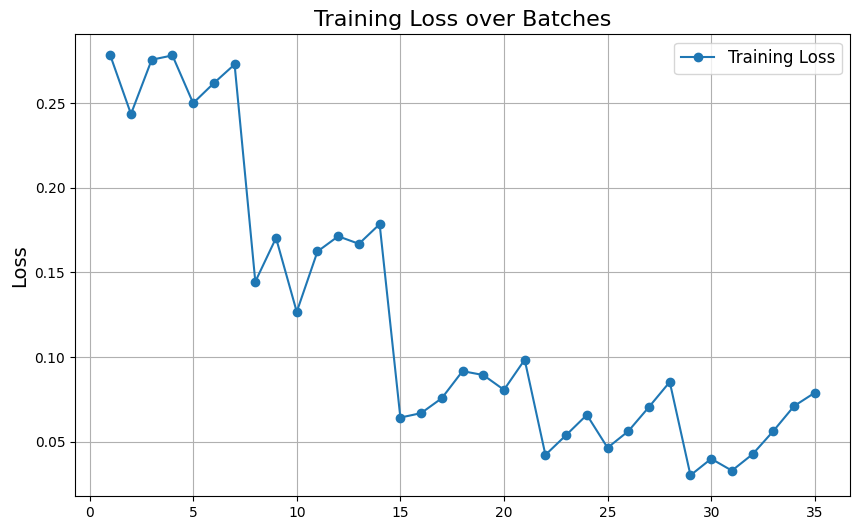

In [54]:
plot_training_loss(train_losses)

đánh giá mô hình

In [55]:
# Kiểm tra trên bộ validation
model.eval()  # Chuyển sang chế độ đánh giá
correct = 0
total = 0

with torch.no_grad():  # Không tính toán gradient trong quá trình đánh giá
    for inputs, labels in val_loader:  # val_loader là DataLoader của bạn cho bộ validation
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total  # Tính độ chính xác
print(f"Accuracy on validation set: {accuracy:.2f}%")


Accuracy on validation set: 98.62%


lưu các tham số

In [56]:
# Lưu tham số mô hình
torch.save(model.state_dict(), "/content/drive/MyDrive/BTL_AI/model_weights.pth")
print("Đã lưu tham số mô hình vào file model_weights.pth")


Đã lưu tham số mô hình vào file model_weights.pth


predict image (dog or cat)

---




In [ ]:
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prediction function
def predict_image(model, image_path, device):
    model.eval()  # Set the model to evaluation mode
    image = Image.open(image_path).convert('RGB')  # Open and convert the image to RGB
    image_tensor = transform(image).unsqueeze(0).to(device)  # Preprocess and add batch dimension

    with torch.no_grad():  # Disable gradient calculation
        output = model(image_tensor)  # Get predictions
        _, predicted = torch.max(output, 1)  # Get class with highest probability

    classes = ['Cat', 'Dog']  # Class labels
    return classes[predicted.item()]  # Return the predicted class label

In [ ]:
# Example usage
image_path = '/content/datasets/dogcat/test1/test1/10234.jpg'  # Path to the image
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and weights
model = SimpleCNN().to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/BTL_AI/model_weights.pth",
                                 map_location=device),
                                strict=False)

# Make prediction
prediction = predict_image(model, image_path, device)
print(f"Predicted: {prediction}")

<ipython-input-16-257372c93c7a>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/BTL_AI/model_weights.pth",


NameError: name 'predict_image' is not defined